# This Model Uses basic imaging processing techniques to determine if a concrete image is cracked or not cracked.
*Steps*

*1. I read in the image and convert to gray scale*

*2. I normalize the pixel values *

*3. I obtain the mean pixels for each normalized image and perform image centering by subtracting all the pixels from the mean*

*Then I use several experimentations and iterations manually to determine what threshold is relevant for differentiating between crack and no crack *


In [ ]:
#IMPORT LIBRARIES

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt





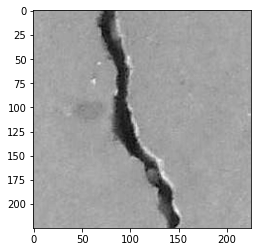

In [ ]:
#Read image of crack and no crack and convert image to grayscale
IMG_SIZE = 225
img = cv2.imread('/content/00001.jpg', 0)
img_no_crack = cv2.imread("/content/00004.jpg", 0)
img=cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img, cmap="gray")

#img2 = cv2.imread("")

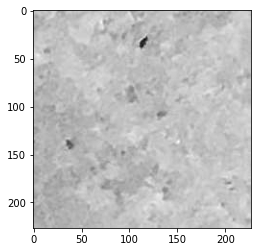

In [ ]:
plt.imshow(img_no_crack, cmap="gray")

In [ ]:
#check shape of original image
img.shape

(225, 225)

In [ ]:
#Convert image to numpy array for mathematical operation
img_arr = np.array(img)
img_arr.shape

(225, 225)

In [ ]:
#Print average pixel intensity of cracked image before normalization
#Average1_img = img.mean(axis=(0,1,2))
Average1_img = img.mean()
print(Average1_img)

131.99863703703704


In [ ]:
#Print average pixel intensity of no crack before normalization
average_no_crack = img_no_crack.mean()
print(average_no_crack)

186.06792291719225


# Normalize Images of both crack and no crack

In [ ]:
#Normalize crack image
img_arr = img_arr.astype(np.float64)
img_normalized = img_arr/255.0



In [ ]:
#Normalize no_crack image
img_no_crack_arr =img_no_crack.astype(np.float64)
no_crack_normalized = img_no_crack_arr/255.0

In [ ]:
#check shape of normalized image
img_normalized.shape
no_crack_normalized.shape


(227, 227)

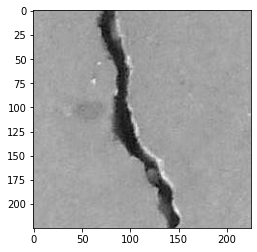

In [ ]:
plt.imshow(img_normalized, cmap="gray")

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 4., 1., 0.],
        [0., 0., 0., ..., 3., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.]]),
 array([0.17647059, 0.23254902, 0.28862745, 0.34470588, 0.40078431,
        0.45686275, 0.51294118, 0.56901961, 0.62509804, 0.68117647,
        0.7372549 ]),
 <a list of 225 Lists of Patches objects>)

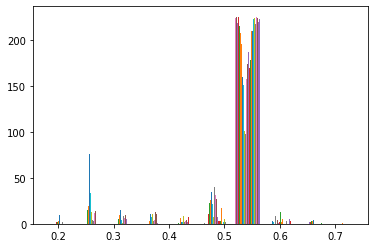

In [ ]:
plt.hist(img_normalized)

# Experimentation to determine threshold if average mean is used as criteria for classification

#Threshold was around 0.70 (cracked image is less than 0.7 and no crack is greater than 0.7)

In [ ]:
from numpy.core.fromnumeric import mean
#Perform pixel subtraction across all images
img_mean = img_normalized.mean()
no_crack_normalized_mean = no_crack_normalized.mean()
print("mean of crack image is:", img_mean)
print("mean of no crack image is: ", no_crack_normalized_mean)

mean of crack image is: 0.5176417138707334
mean of no crack image is:  0.7296781290870283


In [ ]:
print(img_normalized)

[[0.52156863 0.5254902  0.5372549  ... 0.54509804 0.54509804 0.54509804]
 [0.52941176 0.53333333 0.5372549  ... 0.54509804 0.54509804 0.54509804]
 [0.54509804 0.54117647 0.54117647 ... 0.54509804 0.54509804 0.54509804]
 ...
 [0.54117647 0.54509804 0.54509804 ... 0.54901961 0.54901961 0.54901961]
 [0.54117647 0.54509804 0.54509804 ... 0.54901961 0.54901961 0.54901961]
 [0.54117647 0.54509804 0.54509804 ... 0.54901961 0.54901961 0.54901961]]


In [ ]:
average_img_normalized = img_normalized.mean()
print(average_img_normalized)

0.5176417138707334


In [ ]:
#Threshold testing and use in classification based on average pixel Intensity
if img_mean < 0.7:
  print("This concrete has a crack")
else:
  print("This concrete has no crack")

This concrete has a crack


# Classifying crack versus no crack based on pixel centering: Each pixel value is subtracted from mean pixel value to determine if image is a crack or not

In [ ]:
#Subract pixels
img_centered = img_normalized - img_mean
mean_centered = mean(img_centered)
print(mean_centered)

4.2386944434479063e-17


In [ ]:
#Subtract pixels from mean pixel value
no_crack_normalized_centered = no_crack_normalized - no_crack_normalized_mean
no_crack_normalized_centered_mean = mean(no_crack_normalized_centered)
print(no_crack_normalized_centered_mean)

1.3263468997249051e-16


In [ ]:
#Threshold condition for image centering classification
if mean_centered > 0:
  print("This concrete has a crack")
else:
  print("This concrete has no crack")

This concrete has a crack


(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 4., 1., 0.],
        [0., 0., 0., ..., 3., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.]]),
 array([-0.34117113, -0.28509269, -0.22901426, -0.17293583, -0.1168574 ,
        -0.06077897, -0.00470054,  0.05137789,  0.10745633,  0.16353476,
         0.21961319]),
 <a list of 225 Lists of Patches objects>)

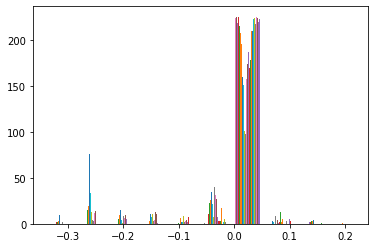

In [ ]:
plt.hist(img_centered)

In [ ]:
#plt.hist(img_no_crack_centered)

In [ ]:
#plt.hist(img_sum)

In [ ]:
arr1 =[1,2,3]
arr2=[4,5,6]
print(mean(arr1))

2.0


In [ ]:
cent = arr1- mean(arr1)
print(cent)

[-1.  0.  1.]


In [ ]:
#Sum normalized pixels up


#
#print(no_crack_normalized)
#print(sum_img)
#new_s = sum_img - no_crack_normalized_mean



In [ ]:
#

In [ ]:
#plt.hist(no_crack_normalized)